In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import kurtosis, skew
from scipy.stats import kstest, norm


In [9]:
df = pd.read_csv ('C:/Users/Mariana Moledo/Documents/GitHub/tcc_mba_cd/bd_alunos_evadidos.csv',sep=";")


In [10]:
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'cep_destino', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [11]:
df.shape

(9144, 37)

In [12]:
df['CR'] = df['CR'].astype(float)
df['ENEMLINGUAGEM'] = df['ENEMLINGUAGEM'].astype(float)
df['ENEMHUMANAS'] = df['ENEMHUMANAS'].astype(float)
df['ENEMNATURAIS'] = df['ENEMNATURAIS'].astype(float)
df['ENEMMATEMATICA'] = df['ENEMMATEMATICA'].astype(float)
df['ENEMREDACAO'] = df['ENEMREDACAO'].astype(float)
df['ANODESVINCULACAO'] = df['ANODESVINCULACAO'].astype(float)
df['IDADE'] = df['IDADE'].astype(float)
df['CHCURSADA'] = df['CHCURSADA'].astype(float)
df['TEMPOPERMANENCIA'] = df['TEMPOPERMANENCIA'].astype(float)
print(df.dtypes)

Unnamed: 0                 int64
CODALUNO                   int64
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                      int64
CODTURNOINGRESSO           int64
CODTURNOATUAL              int64
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                   int64
RESULTDISC                 int64
PERIODODISC                int64
ANOINGRESSO                int64
SEMESTREINGRESSO           int64
ANODESVINCULACAO         float64
SEMESTREDESVINCULACAO      int64
IDADE                    float64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                 int64
CHCURSADA                float64
ESTADOCIVIL               object
TRANCAMENTOS               int64
TEMPOPERMA

# Dados Categóricos
CODALUNO, ACAOAFIRMATIVA, CURSO, CODTURNOINGRESSO, CODTURNOATUAL, TURNOATUAL, DISCIPLINA, RESULTDISC, PERIODODISC, ANOINGRESSO, SEMESTREINGRESSO, ANODESVINCULACAO, SEMESTREDESVINCULACAO, COR, BAIRRO, CEP, CIDADE, MOBILIDADE, ESTADOCIVIL, SEXO, STATUSFORMACAO


M    4983
F    4161
Name: SEXO, dtype: int64
M    0.544948
F    0.455052
Name: SEXO, dtype: float64


Text(0, 0.5, 'Frequência')

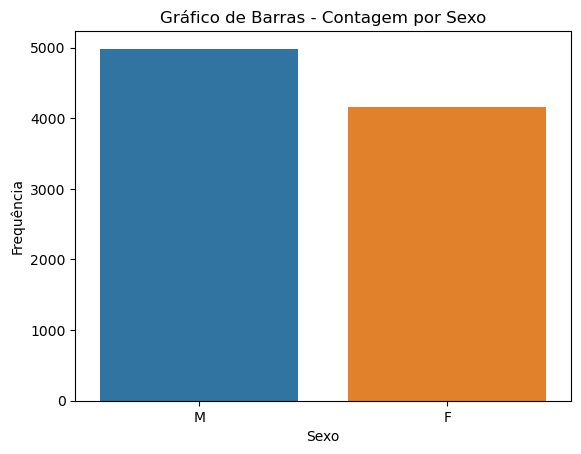

In [15]:
#Frequência Sexo 
frequencia_sexo = df['SEXO'].value_counts()
print(frequencia_sexo)

#Proporção Sexo
proporcao_sexo = df['SEXO'].value_counts(normalize=True)
print(proporcao_sexo) 

#Gráfico de Barras
sns.barplot(x=frequencia_sexo.index, y=frequencia_sexo.values)
plt.title('Gráfico de Barras - Contagem por Sexo') #Adicionando título ao gráfico
plt.xlabel('Sexo') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos


SOLTEIRO    8863
CASADO       281
Name: ESTADOCIVIL, dtype: int64
SOLTEIRO    0.969269
CASADO      0.030731
Name: ESTADOCIVIL, dtype: float64


Text(0, 0.5, 'Frequência')

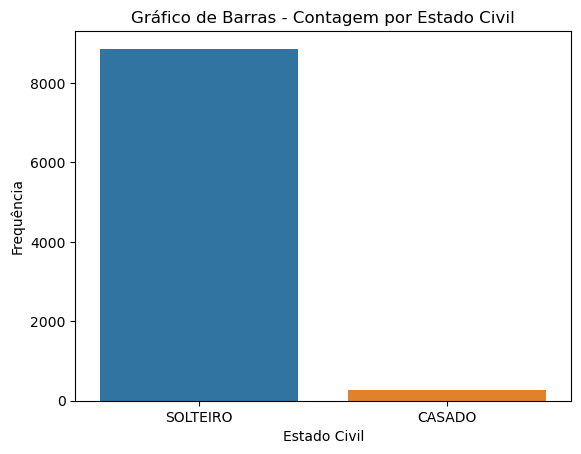

In [16]:
#Frequência Estado Civil
frequencia_estadocivil = df['ESTADOCIVIL'].value_counts()
print(frequencia_estadocivil)

#Proporção Estado Civil
proporcao_estadocivil = df['ESTADOCIVIL'].value_counts(normalize=True)
print(proporcao_estadocivil)

#Gráfico de Barras
sns.barplot(x=frequencia_estadocivil.index, y=frequencia_estadocivil.values)
plt.title('Gráfico de Barras - Contagem por Estado Civil') #Adicionando título ao gráfico
plt.xlabel('Estado Civil') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

In [17]:
tabela_contingencia = pd.crosstab(df['SEXO'], df['ESTADOCIVIL'])
print(tabela_contingencia)

ESTADOCIVIL  CASADO  SOLTEIRO
SEXO                         
F               117      4044
M               164      4819


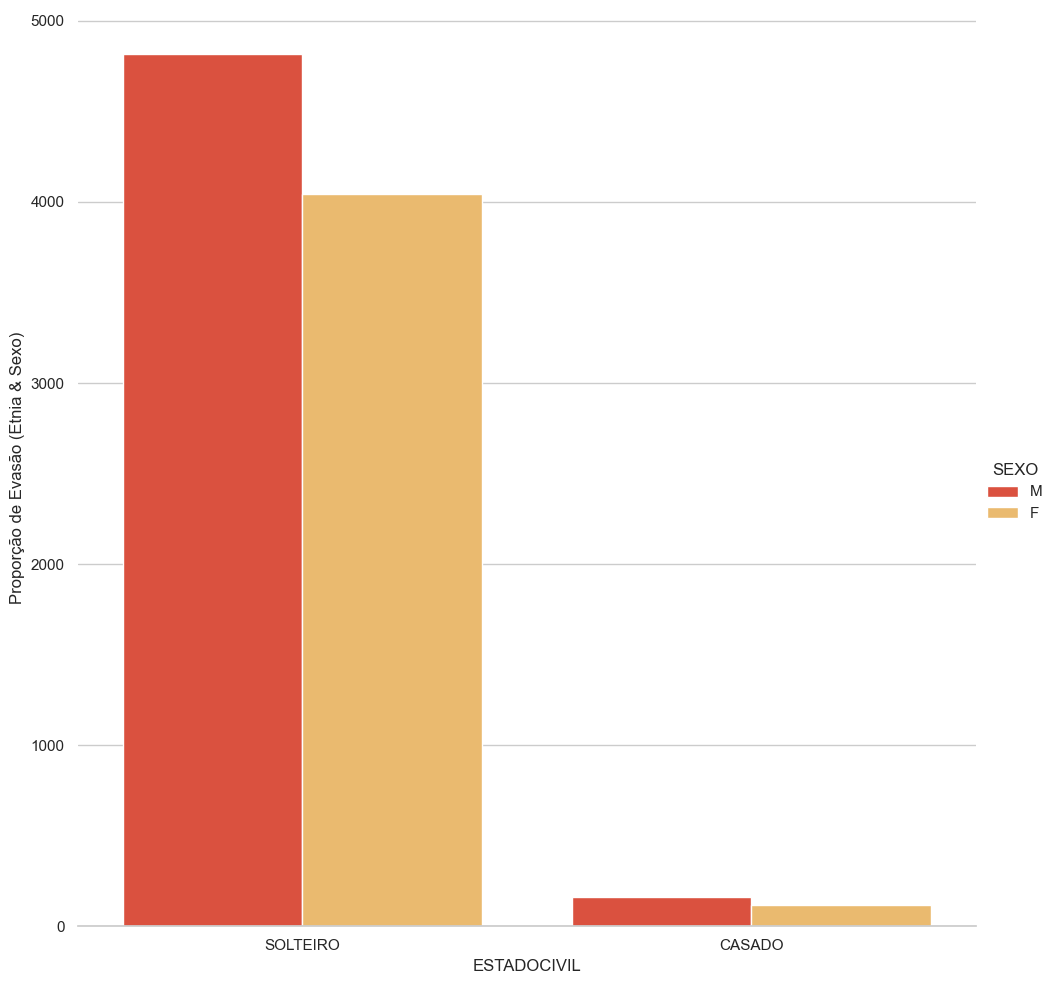

In [18]:
sns.set(style="whitegrid")
g = sns.catplot(x="ESTADOCIVIL", hue="SEXO", data=df, height=10, kind="count", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Etnia & Sexo)");

NÃO DECLARADO    6595
BRANCA           1212
PARDA             876
NEGRA             431
AMARELA            20
INDÍGENA           10
Name: COR, dtype: int64
NÃO DECLARADO    0.721238
BRANCA           0.132546
PARDA            0.095801
NEGRA            0.047135
AMARELA          0.002187
INDÍGENA         0.001094
Name: COR, dtype: float64


Text(0, 0.5, 'Frequência')

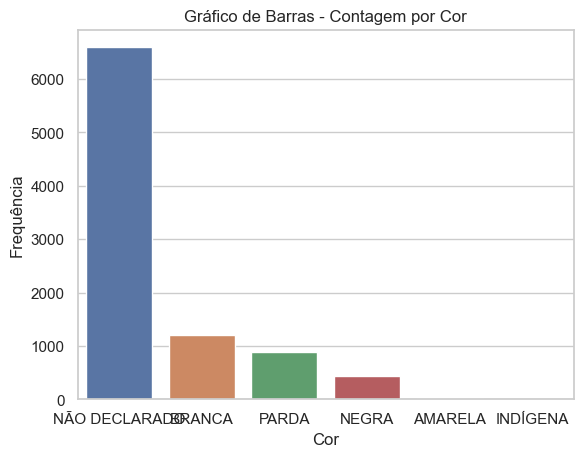

In [19]:
#Frequência Cor
frequencia_cor = df['COR'].value_counts()
print(frequencia_cor)

#Proporção Cor
proporcao_cor = df['COR'].value_counts(normalize=True)
print(proporcao_cor)

#Gráfico de Barras
sns.barplot(x=frequencia_cor.index, y=frequencia_cor.values)
plt.title('Gráfico de Barras - Contagem por Cor') #Adicionando título ao gráfico
plt.xlabel('Cor') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

AC    7170
A1     531
L2     530
L4     506
L1     227
L3     180
Name: ACAOAFIRMATIVA, dtype: int64
AC    0.784121
A1    0.058071
L2    0.057962
L4    0.055337
L1    0.024825
L3    0.019685
Name: ACAOAFIRMATIVA, dtype: float64


Text(0, 0.5, 'Frequência')

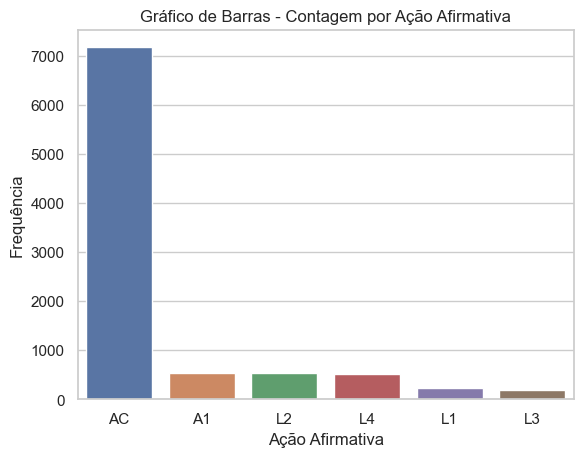

In [20]:
#Frequência Ação Afirmativa
frequencia_ACAOAFIRMATIVA = df['ACAOAFIRMATIVA'].value_counts()
print(frequencia_ACAOAFIRMATIVA)

#Proporção Ação Afirmativa
proporcao_ACAOAFIRMATIVA = df['ACAOAFIRMATIVA'].value_counts(normalize=True)
print(proporcao_ACAOAFIRMATIVA)

#Gráfico de Barras
sns.barplot(x=frequencia_ACAOAFIRMATIVA.index, y=frequencia_ACAOAFIRMATIVA.values)
plt.title('Gráfico de Barras - Contagem por Ação Afirmativa') #Adicionando título ao gráfico
plt.xlabel('Ação Afirmativa') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

INTEGRAL      5249
NOTURNO       2917
MATUTINO       683
VESPERTINO     281
Name: TURNOATUAL, dtype: int64
INTEGRAL      0.574918
NOTURNO       0.319496
MATUTINO      0.074808
VESPERTINO    0.030778
Name: TURNOATUAL, dtype: float64


Text(0, 0.5, 'Frequência')

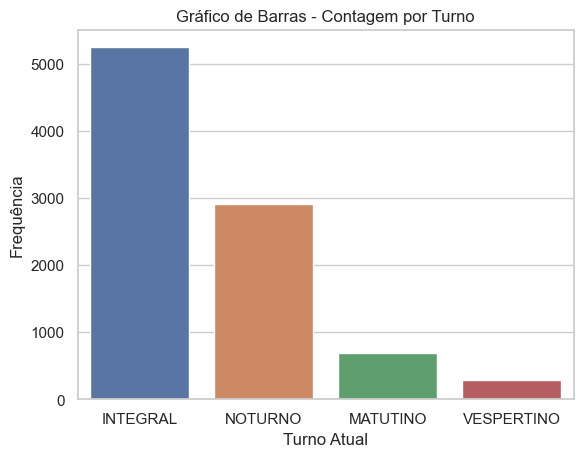

In [21]:
#Frequência TurnoAtual
frequencia_TurnoAtual = df['TURNOATUAL'].value_counts()
print(frequencia_TurnoAtual)

#Proporção TurnoAtual
proporcao_TurnoAtual = df['TURNOATUAL'].value_counts(normalize=True)
print(proporcao_TurnoAtual)

#Gráfico de Barras
sns.barplot(x=frequencia_TurnoAtual.index, y=frequencia_TurnoAtual.values)
plt.title('Gráfico de Barras - Contagem por Turno') #Adicionando título ao gráfico
plt.xlabel('Turno Atual') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

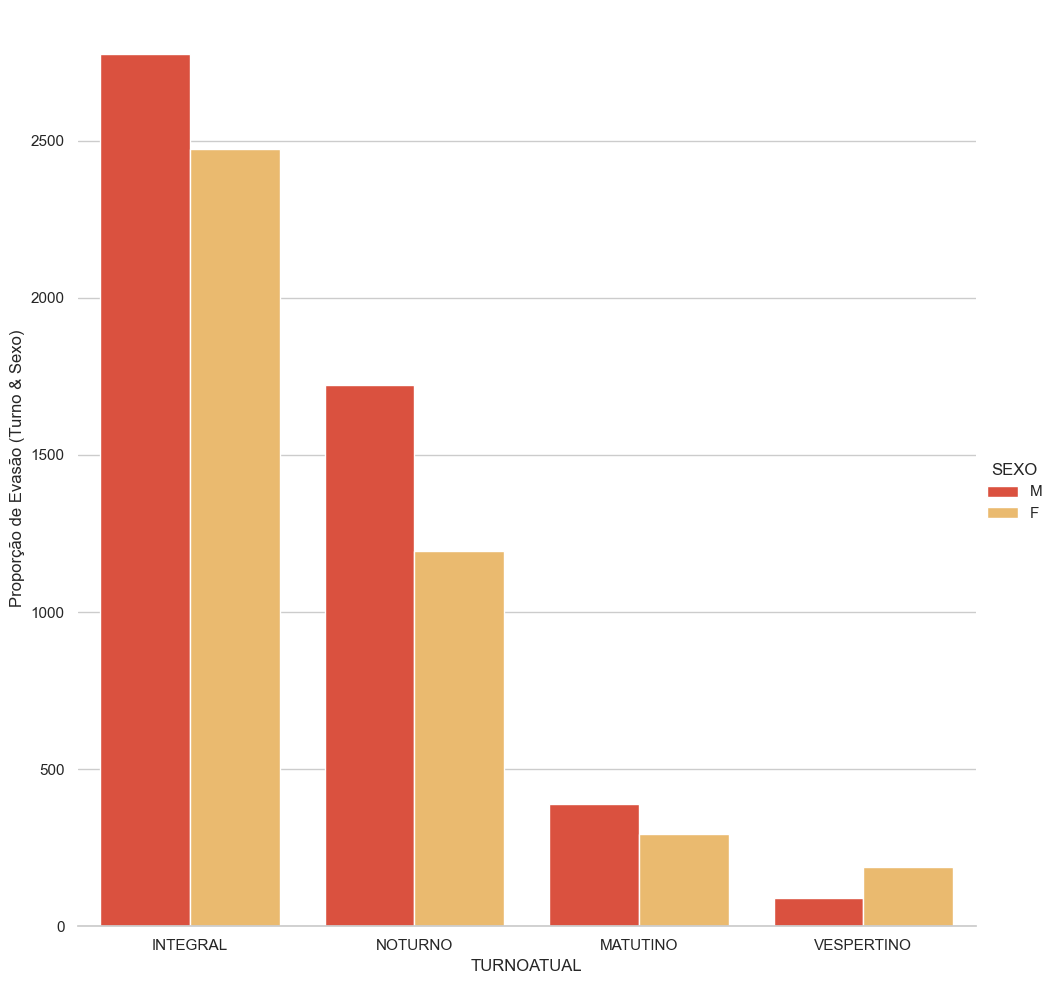

In [24]:
sns.set(style="whitegrid")
g = sns.catplot(x="TURNOATUAL", hue="SEXO", data=df, height=10, kind="count", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Turno & Sexo)");

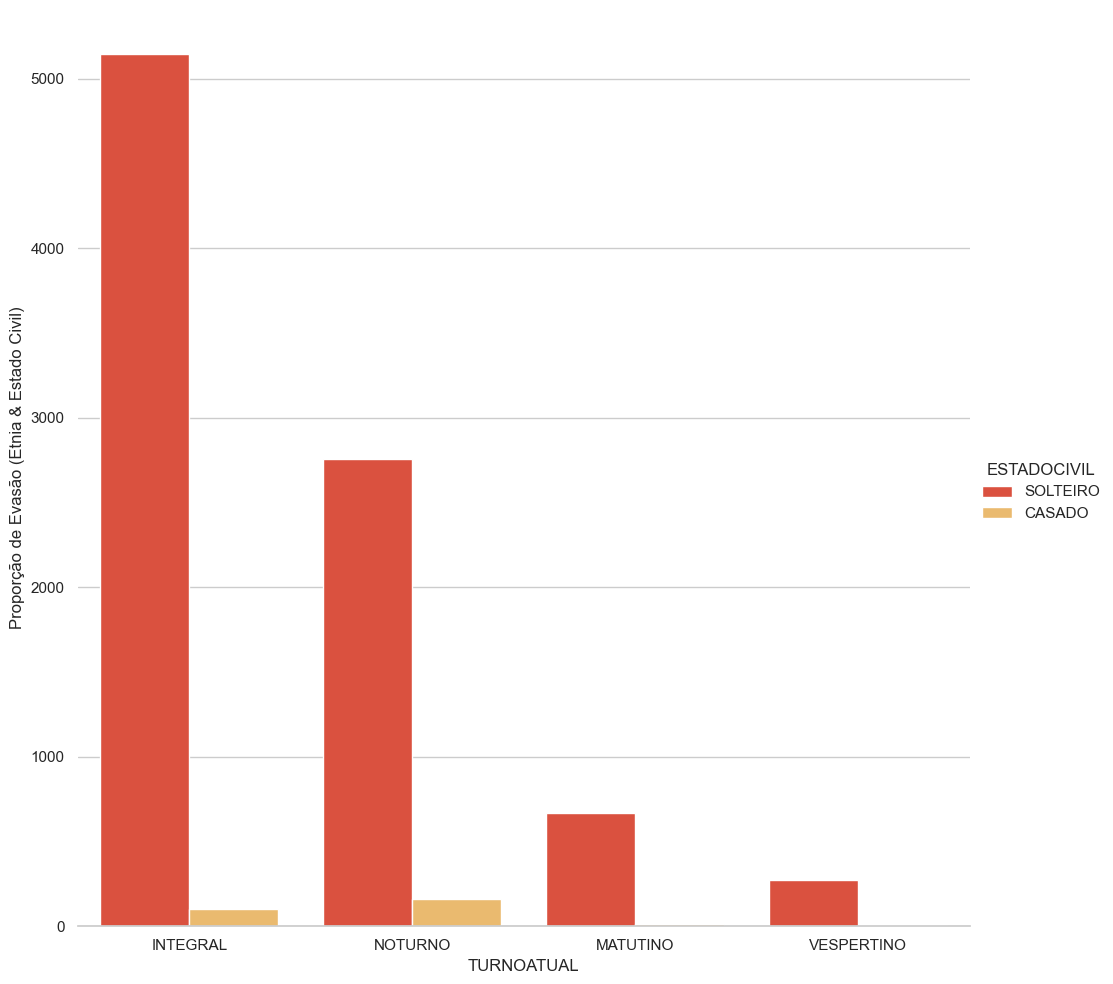

In [25]:
sns.set(style="whitegrid")
g = sns.catplot(x="TURNOATUAL", hue="ESTADOCIVIL", data=df, height=10, kind="count", palette="YlOrRd_r")
g.despine(left=True)
g.set_ylabels("Proporção de Evasão (Etnia & Estado Civil)");

2013    3808
2014    3747
2012    1589
Name: ANOINGRESSO, dtype: int64
2013    0.416448
2014    0.409777
2012    0.173775
Name: ANOINGRESSO, dtype: float64


Text(0, 0.5, 'Frequência')

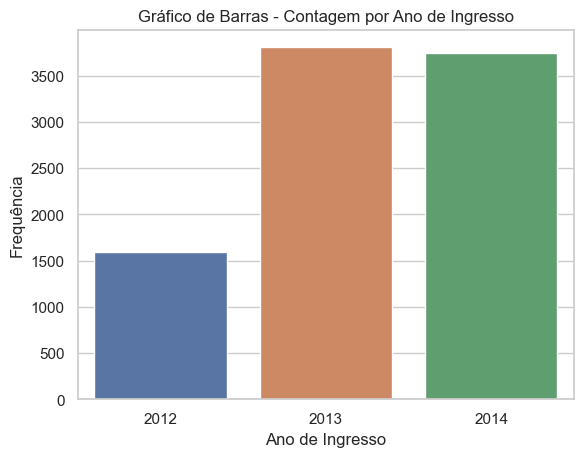

In [26]:
#Frequência Ano Ingresso
frequencia_AnoIngresso = df['ANOINGRESSO'].value_counts()
print(frequencia_AnoIngresso)

#Proporção Ano Ingresso
proporcao_AnoIngresso = df['ANOINGRESSO'].value_counts(normalize=True)
print(proporcao_AnoIngresso)

#Gráfico de Barras
sns.barplot(x=frequencia_AnoIngresso.index, y=frequencia_AnoIngresso.values)
plt.title('Gráfico de Barras - Contagem por Ano de Ingresso') #Adicionando título ao gráfico
plt.xlabel('Ano de Ingresso') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

1    4935
2    4209
Name: SEMESTREINGRESSO, dtype: int64
1    0.539698
2    0.460302
Name: SEMESTREINGRESSO, dtype: float64


Text(0, 0.5, 'Frequência')

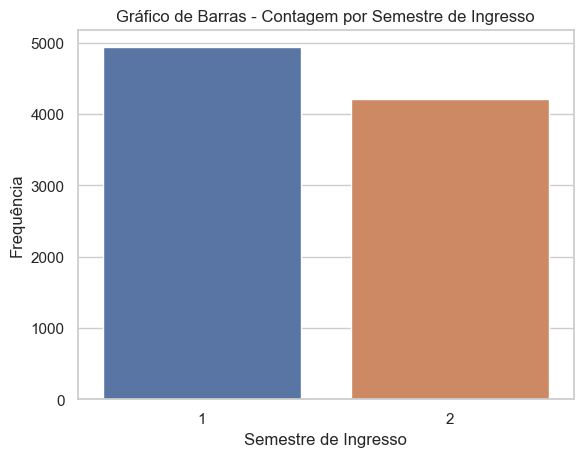

In [27]:
#Frequência Semestre Ingresso
frequencia_SemestreIngresso = df['SEMESTREINGRESSO'].value_counts()
print(frequencia_SemestreIngresso)

#Proporção Semestre Ingresso
proporcao_SemestreIngresso = df['SEMESTREINGRESSO'].value_counts(normalize=True)
print(proporcao_SemestreIngresso)

#Gráfico de Barras
sns.barplot(x=frequencia_SemestreIngresso.index, y=frequencia_SemestreIngresso.values)
plt.title('Gráfico de Barras - Contagem por Semestre de Ingresso') #Adicionando título ao gráfico
plt.xlabel('Semestre de Ingresso') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

23.0    1849
24.0    1785
25.0    1068
22.0     837
26.0     646
27.0     440
28.0     326
29.0     261
30.0     234
31.0     193
32.0     186
33.0     149
34.0     130
35.0     110
37.0      83
36.0      79
38.0      64
21.0      57
39.0      56
40.0      51
42.0      44
41.0      44
46.0      40
44.0      36
45.0      36
51.0      34
50.0      32
47.0      29
52.0      28
43.0      25
54.0      25
53.0      21
48.0      18
49.0      18
56.0      17
55.0      16
57.0      14
62.0      12
58.0      12
59.0      11
60.0      10
63.0       8
61.0       6
64.0       4
Name: IDADE, dtype: int64
23.0    0.202209
24.0    0.195210
25.0    0.116798
22.0    0.091535
26.0    0.070647
27.0    0.048119
28.0    0.035652
29.0    0.028543
30.0    0.025591
31.0    0.021107
32.0    0.020341
33.0    0.016295
34.0    0.014217
35.0    0.012030
37.0    0.009077
36.0    0.008640
38.0    0.006999
21.0    0.006234
39.0    0.006124
40.0    0.005577
42.0    0.004812
41.0    0.004812
46.0    0.004374
44.0    0.0

Text(0, 0.5, 'Frequência')

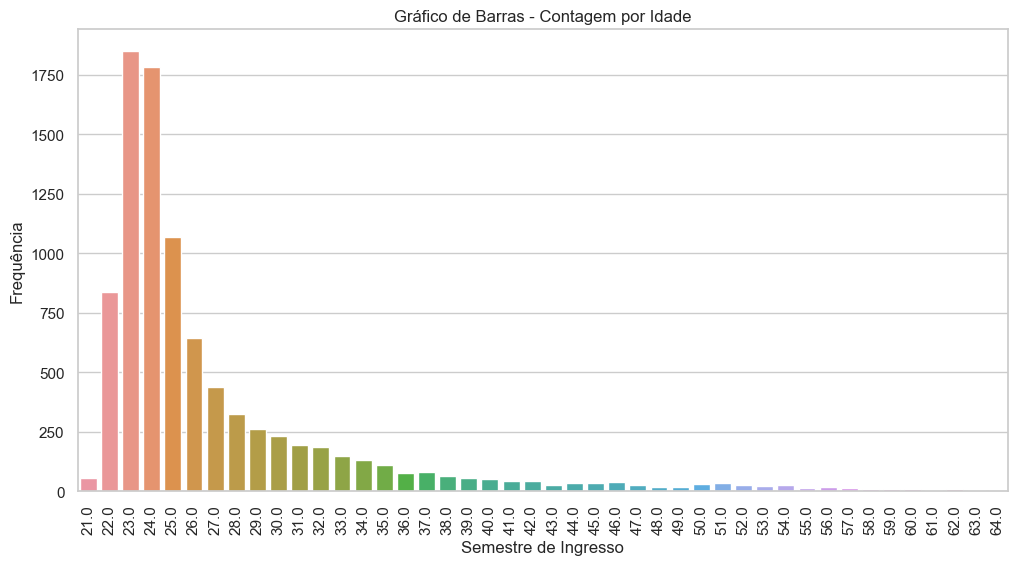

In [28]:
#Frequência Idade
frequencia_idade = df['IDADE'].value_counts()
print(frequencia_idade)

#Proporção Semestre Ingresso
proporcao_idade = df['IDADE'].value_counts(normalize=True)
print(proporcao_idade)

#Gráfico de Barras
plt.figure(figsize=(12, 6)) # Define o tamanho total da figura (largura, altura)
sns.barplot(x=frequencia_idade.index, y=frequencia_idade.values)
plt.title('Gráfico de Barras - Contagem por Idade') #Adicionando título ao gráfico
plt.xticks(rotation=90) #rotacionando os valores do eixo x
plt.xlabel('Semestre de Ingresso') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9144 non-null   int64  
 1   CODALUNO               9144 non-null   int64  
 2   ACAOAFIRMATIVA         9144 non-null   object 
 3   ENEMLINGUAGEM          9144 non-null   float64
 4   ENEMHUMANAS            9144 non-null   float64
 5   ENEMNATURAIS           9144 non-null   float64
 6   ENEMMATEMATICA         9144 non-null   float64
 7   ENEMREDACAO            9144 non-null   float64
 8   CURSO                  9144 non-null   int64  
 9   CODTURNOINGRESSO       9144 non-null   int64  
 10  CODTURNOATUAL          9144 non-null   int64  
 11  TURNOATUAL             9130 non-null   object 
 12  CR                     9144 non-null   float64
 13  DISCIPLINA             9144 non-null   object 
 14  NOTADISC               9144 non-null   int64  
 15  RESU

In [30]:
df['SEXO'] = df['SEXO'].astype('category')
df['STATUSFORMACAO'] = df['STATUSFORMACAO'].astype('category')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             9144 non-null   int64   
 1   CODALUNO               9144 non-null   int64   
 2   ACAOAFIRMATIVA         9144 non-null   object  
 3   ENEMLINGUAGEM          9144 non-null   float64 
 4   ENEMHUMANAS            9144 non-null   float64 
 5   ENEMNATURAIS           9144 non-null   float64 
 6   ENEMMATEMATICA         9144 non-null   float64 
 7   ENEMREDACAO            9144 non-null   float64 
 8   CURSO                  9144 non-null   int64   
 9   CODTURNOINGRESSO       9144 non-null   int64   
 10  CODTURNOATUAL          9144 non-null   int64   
 11  TURNOATUAL             9130 non-null   object  
 12  CR                     9144 non-null   float64 
 13  DISCIPLINA             9144 non-null   object  
 14  NOTADISC               9144 non-null   i

Será que existe uma relação ou associação significativa entre as variváveis Sexo e Estado Civil? Vamos utilizar o teste qui-quadrado de independência para avaliar a dependência entre as variáveis e determinar se elas estão relacionadas ou não. 

In [32]:
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)

print(f"Chi-square statistic: {chi2}") # Imprimir o resultado
print(f"P-value: {p_value}") # Imprimir o resultado

Chi-square statistic: 1.5920973061942783
P-value: 0.20702674304149896


In [33]:
df.shape

(9144, 37)

Com base em um nível de significância de 0,05, como o valor-p é maior que o nível de significância, isso significa que não há evidências estatísticas para suportar a hipótese de que as variáveis categóricas em estudo estão associadas. Portanto, não há relação significativa entre as variáveis categóricas na população.

# Dados Numéricos

ENEMLINGUAGEM, ENEMHUMANAS, ENEMNATURAIS, ENEMMATEMATICA, ENEMREDACAO, CR, NOTADISC, IDADE, CHCURSADA, TRANCAMENTOS, TEMPOPERMANENCIA.

In [35]:
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'cep_destino', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [34]:
# Resumo Estatístico
df.describe()

,Unnamed: 0,CODALUNO,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,...,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA,DISTANCIA_NUM
count,9144.000000,9.144000e+03,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,...,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.0,9144.000000,9144.000000,9144.000000,1866.000000
mean,4571.500000,1.593132e+08,594.012445,633.149836,581.151422,667.458136,710.513451,105.017279,6.494094,6.222113,...,2013.236002,1.460302,2015.232830,1.466973,27.159011,0.0,378.880577,0.032043,2.996829,53.304523
std,2639.789764,4.983645e+07,56.180845,70.536782,70.665761,97.854600,132.881852,123.969830,2.528449,2.363636,...,0.726576,0.498449,1.821623,0.498935,6.851089,0.0,485.025671,0.201061,1.757685,104.288750
min,0.000000,1.120010e+08,100.000000,0.000000,0.000000,100.000000,100.000000,1.000000,2.000000,1.000000,...,2012.000000,1.000000,2012.000000,1.000000,21.000000,0.0,0.000000,0.000000,1.000000,0.000000
25%,2285.750000,1.130651e+08,564.975000,590.800000,540.675000,609.400000,620.000000,21.000000,4.000000,4.000000,...,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.0,0.000000,0.000000,1.000000,3.300000
50%,4571.500000,1.140770e+08,599.600000,639.300000,586.550000,676.100000,720.000000,44.000000,8.000000,8.000000,...,2013.000000,1.000000,2015.000000,1.000000,25.000000,0.0,240.000000,0.000000,3.000000,20.200000
75%,6857.250000,2.130571e+08,630.900000,681.700000,628.525000,734.800000,800.000000,222.000000,8.000000,8.000000,...,2014.000000,2.000000,2017.000000,2.000000,28.000000,0.0,540.000000,0.000000,5.000000,42.000000
max,9143.000000,2.141071e+08,786.000000,885.500000,845.200000,955.200000,1000.000000,562.000000,14.000000,14.000000,...,2014.000000,2.000000,2018.000000,2.000000,64.000000,0.0,6070.000000,3.000000,7.000000,983.000000


## CR

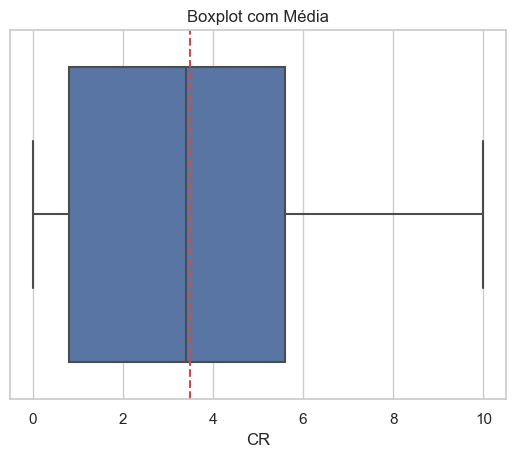

In [36]:
media_cr = sum(df["CR"]) / len(df["CR"])
sns.boxplot(x=df["CR"])
plt.axvline(x=media_cr, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de CR')

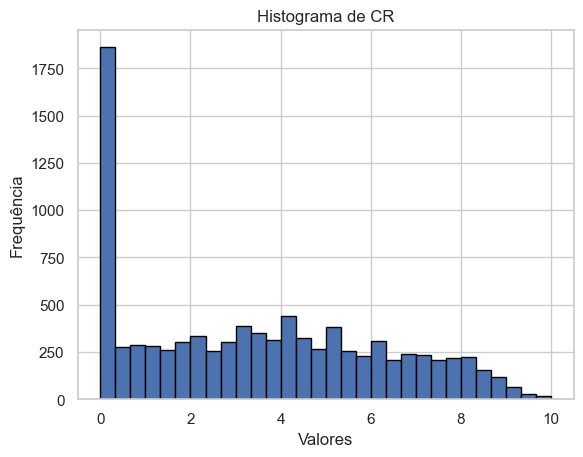

In [37]:
# Histograma CR
plt.hist(df['CR'], bins=30, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de CR')

In [38]:
# Cálculo da assimetria
assimetria = skew(df['CR'])
print("Assimetria:", assimetria)

# Cálculo da curtose
curtose = kurtosis(df['CR'])
print("Curtose:", curtose)

Assimetria: 0.29050247610074653
Curtose: -1.0693253262838858


A função skew retorna um valor negativo se a distribuição for assimétrica à esquerda, um valor positivo se for assimétrica à direita e zero se for simétrica. Quanto maior o valor absoluto, maior a assimetria.

A função kurtosis retorna um valor positivo se a distribuição for mais "pontiaguda" (curtose leptocúrtica) e um valor negativo se for mais "achatada" (curtose platicúrtica) em comparação com a distribuição normal. Um valor de curtose igual a 3 indica uma distribuição normal padrão.

Lembre-se de que a função kurtosis retorna a curtose excessiva, ou seja, a curtose menos 3. Portanto, uma curtose igual a 0 representa uma distribuição normal.

In [39]:
# Teste de Kolmogorov-Smirnov
stat, p_value_cr = kstest(df['CR'], norm.cdf)

print(p_value_cr, stat)

# Interpretação do resultado
if p_value_cr > 0.05:
    print("A amostra segue uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")


0.0 0.6299752196561552
A amostra não segue uma distribuição normal.


## Tempo de Permanência

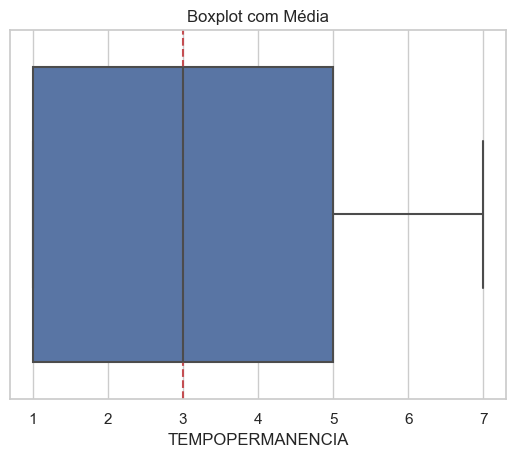

In [41]:
media_tempopermanencia = sum(df["TEMPOPERMANENCIA"]) / len(df["TEMPOPERMANENCIA"])
sns.boxplot(x=df["TEMPOPERMANENCIA"])
plt.axvline(x=media_tempopermanencia, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de Tempo de Permanência')

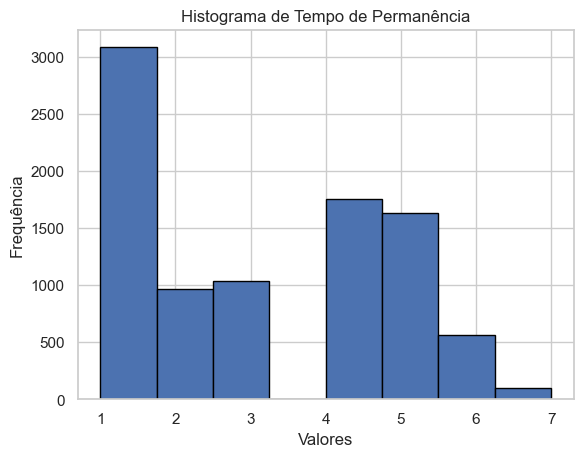

In [42]:
# Histograma Tempo de Permanência
plt.hist(df['TEMPOPERMANENCIA'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de Tempo de Permanência')

In [43]:
# Cálculo da assimetria
assimetria = skew(df['TEMPOPERMANENCIA'])
print("Assimetria:", assimetria)

# Cálculo da curtose
curtose = kurtosis(df['TEMPOPERMANENCIA'])
print("Curtose:", curtose)

Assimetria: 0.21934603653344337
Curtose: -1.2930239247007804


In [44]:
# Teste de Kolmogorov-Smirnov
stat, p_value_tempopermanencia = kstest(df['TEMPOPERMANENCIA'], norm.cdf)

print(p_value_tempopermanencia, stat)

# Interpretação do resultado
if p_value_tempopermanencia > 0.05:
    print("A amostra segue uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")

0.0 0.8413447460685429
A amostra não segue uma distribuição normal.


## Idade

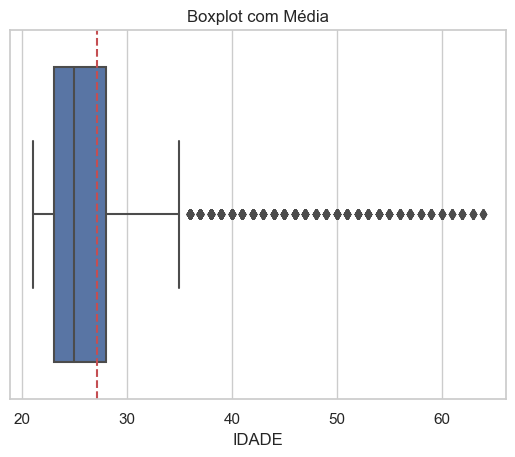

In [45]:
media_idade = sum(df["IDADE"]) / len(df["IDADE"])
sns.boxplot(x=df["IDADE"])
plt.axvline(x=media_idade, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de Idade')

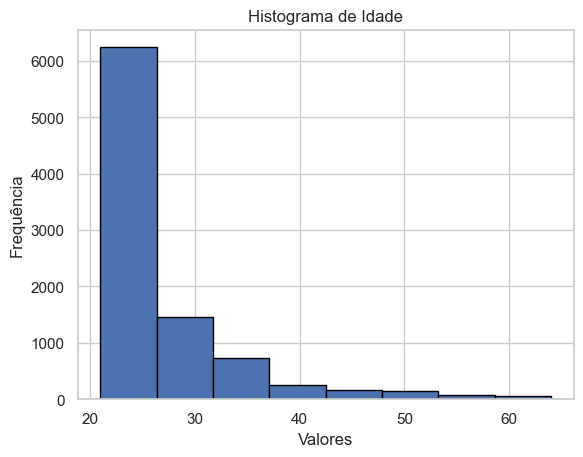

In [46]:
# Histograma Idade
plt.hist(df['IDADE'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')

## CH Cursada

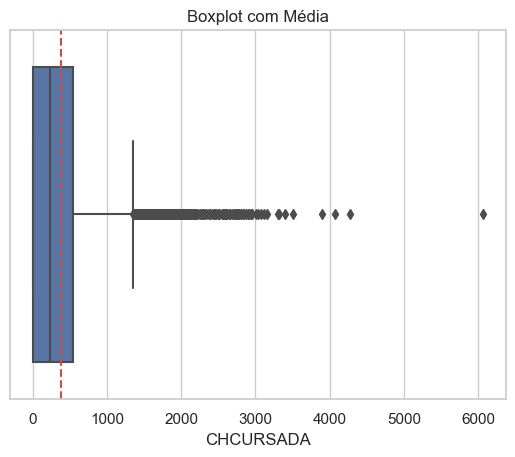

In [47]:
media_chcursada = sum(df["CHCURSADA"]) / len(df["CHCURSADA"])
sns.boxplot(x=df["CHCURSADA"])
plt.axvline(x=media_chcursada, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de CHCursada')

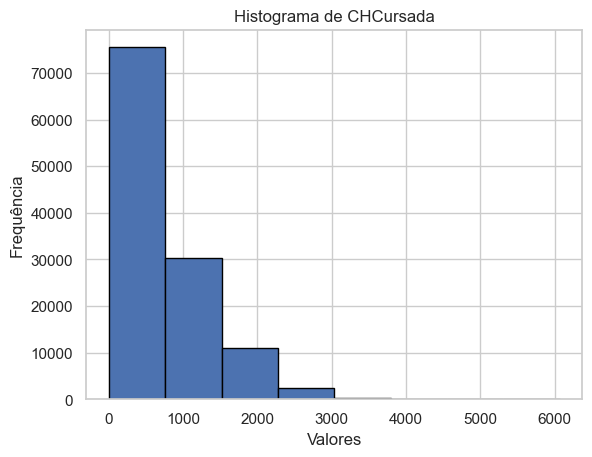

In [44]:
# Histograma CHCursada
plt.hist(evadidos['CHCURSADA'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de CHCursada')

## ENEM Redacao

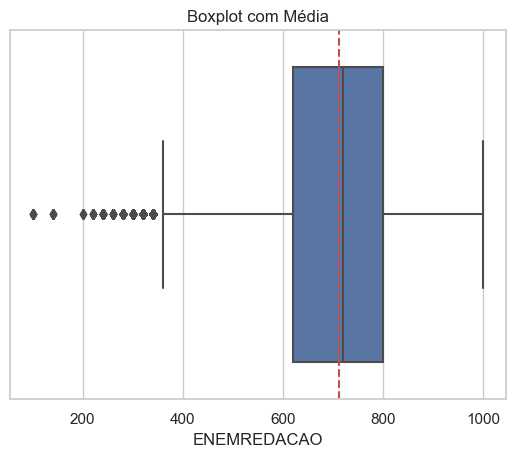

In [45]:
media_ENEMREDACAO = sum(evadidos["ENEMREDACAO"]) / len(evadidos["ENEMREDACAO"])
sns.boxplot(x=evadidos["ENEMREDACAO"])
plt.axvline(x=media_ENEMREDACAO, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

Text(0.5, 1.0, 'Histograma de ENEMREDACAO')

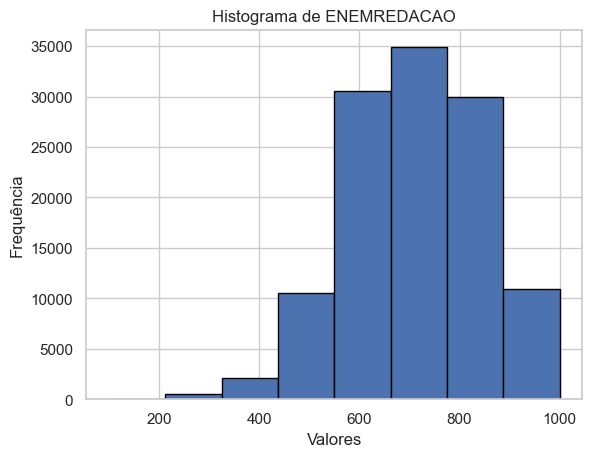

In [46]:
# Histograma ENEM Redacao
plt.hist(evadidos['ENEMREDACAO'], bins=8, edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de ENEMREDACAO')

In [47]:
# Cálculo da assimetria
assimetria = skew(evadidos['ENEMREDACAO'])
print("Assimetria:", assimetria)

# Cálculo da curtose
curtose = kurtosis(evadidos['ENEMREDACAO'])
print("Curtose:", curtose)

Assimetria: -0.2782605965216347
Curtose: -0.054073743890663994


A função skew retorna um valor negativo se a distribuição for assimétrica à esquerda, um valor positivo se for assimétrica à direita e zero se for simétrica. Quanto maior o valor absoluto, maior a assimetria.

A função kurtosis retorna um valor positivo se a distribuição for mais "pontiaguda" (curtose leptocúrtica) e um valor negativo se for mais "achatada" (curtose platicúrtica) em comparação com a distribuição normal. Um valor de curtose igual a 3 indica uma distribuição normal padrão.

Lembre-se de que a função kurtosis retorna a curtose excessiva, ou seja, a curtose menos 3. Portanto, uma curtose igual a 0 representa uma distribuição normal.

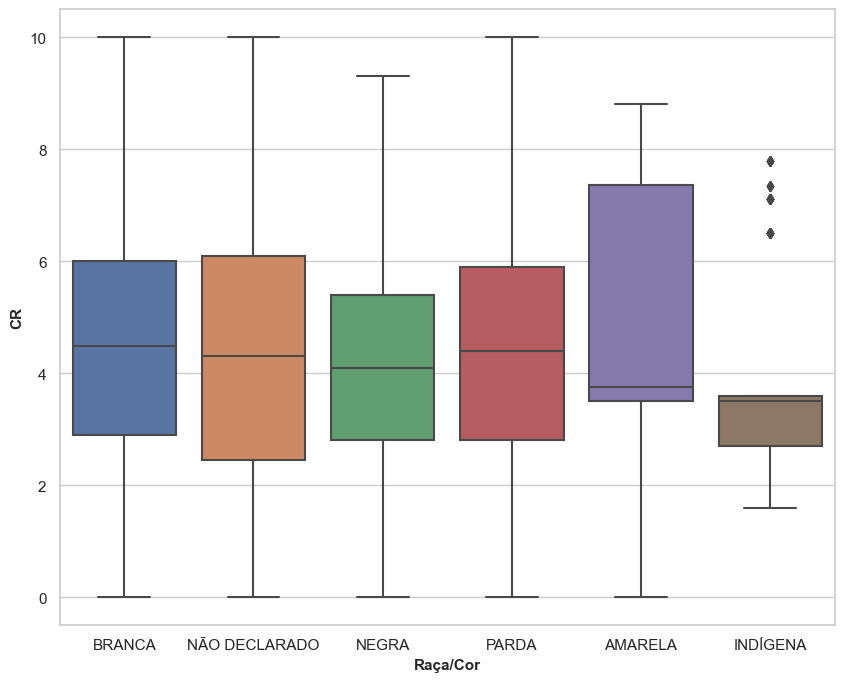

In [48]:
# boxplots CR por categorias (cor, sexo, acaoafirmativa)
plb.figure(figsize=(10,8))
sns.boxplot(x=evadidos["COR"], y=evadidos["CR"])
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.show()

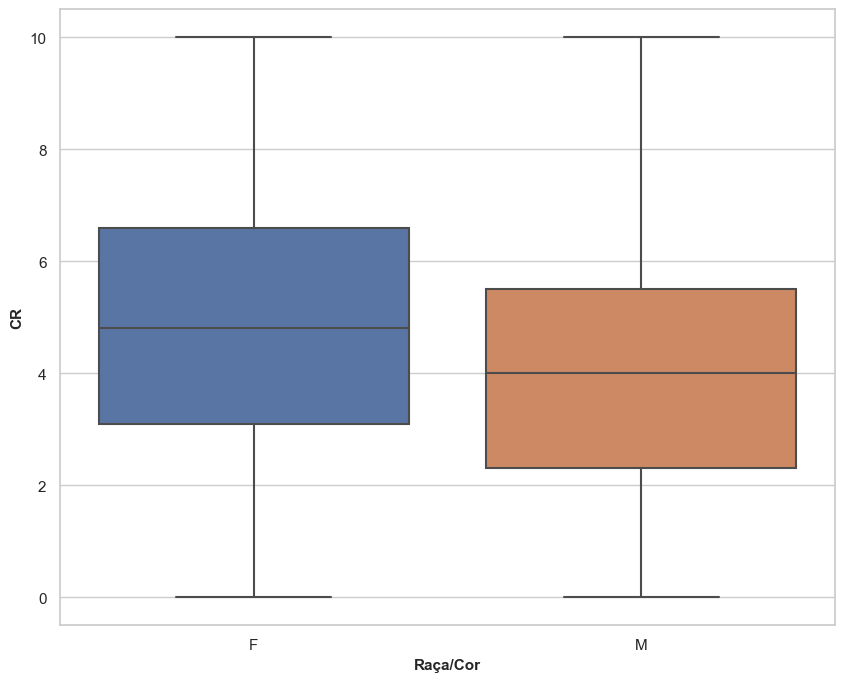

In [49]:
plb.figure(figsize=(10,8))
sns.boxplot(x=evadidos["SEXO"], y=evadidos["CR"])
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.show()

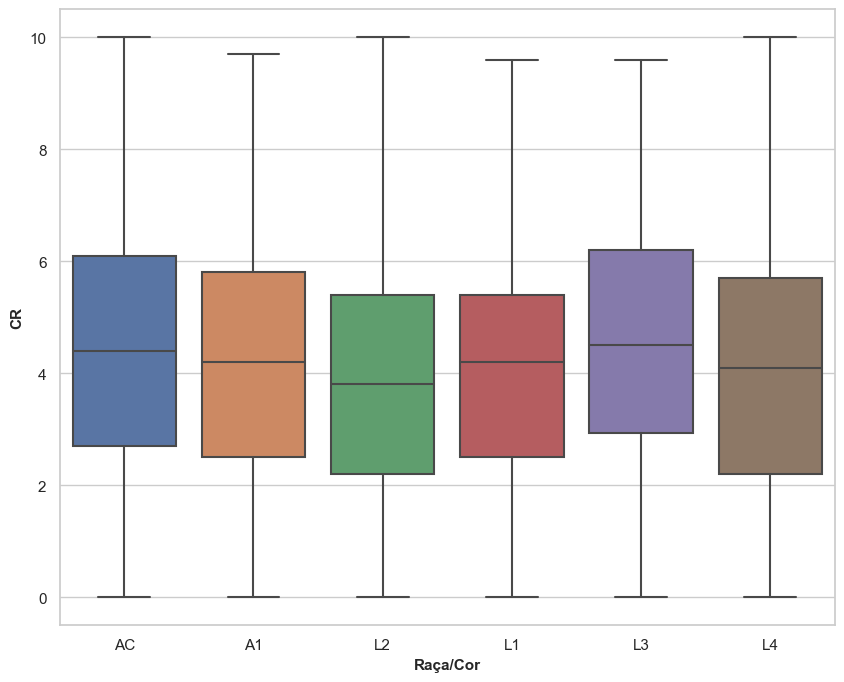

In [50]:
plb.figure(figsize=(10,8))
sns.boxplot(x=evadidos["ACAOAFIRMATIVA"], y=evadidos["CR"])
plb.xlabel('Raça/Cor', fontsize=11, fontweight='bold')
plb.ylabel('CR', fontsize=11, fontweight='bold')
plb.show()

In [51]:
matriz_correlacao = evadidos.corr()
print(matriz_correlacao)

                  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  ENEMMATEMATICA  \
ENEMLINGUAGEM          1.000000     0.592698      0.522941        0.414000   
ENEMHUMANAS            0.592698     1.000000      0.642190        0.499548   
ENEMNATURAIS           0.522941     0.642190      1.000000        0.694721   
ENEMMATEMATICA         0.414000     0.499548      0.694721        1.000000   
ENEMREDACAO            0.288909     0.300624      0.251778        0.180061   
CR                     0.105557     0.102160      0.097955        0.056649   
ANODESVINCULACAO      -0.016707     0.047043     -0.005140       -0.031835   
IDADE                 -0.079687    -0.063180     -0.206670       -0.212596   
CHCURSADA              0.102522     0.068768      0.117607        0.119411   
TEMPOPERMANENCIA      -0.005894    -0.089051     -0.043013       -0.027499   

                  ENEMREDACAO        CR  ANODESVINCULACAO     IDADE  \
ENEMLINGUAGEM        0.288909  0.105557         -0.016707 -0.079687   

C:\Users\Mariana Moledo\AppData\Local\Temp\ipykernel_14104\1617467776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = evadidos.corr()


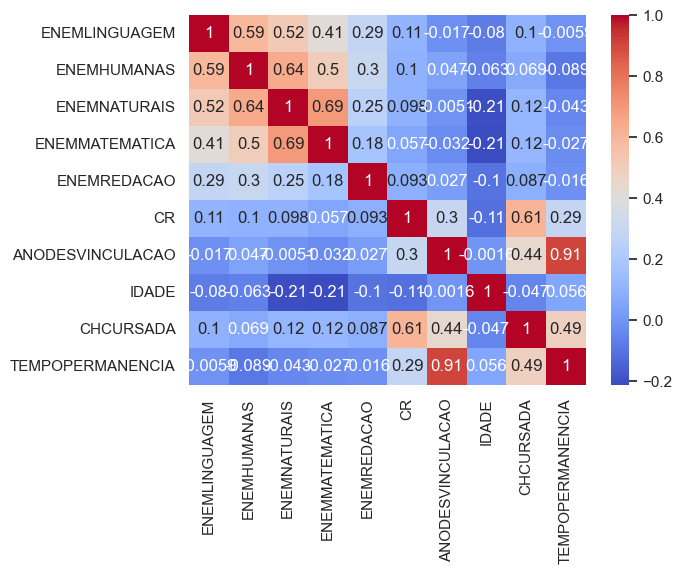

In [52]:
# Plotar a matriz de correlação como um gráfico de calor
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

# Exibir o gráfico
plt.show()

In [53]:
# Análise de Tendência

In [54]:
# Análise de Grupos

In [55]:
# Teste de Tukey

In [56]:
# Qual a idade com mais evasão?